In [1]:
from pathlib import Path

import pandas as pd

file = Path("/home/piotr/Documents/mgr/uwb-rs/data-processing/data/2023-05-21-20:43:13.145050P4-h.csv")

df = pd.read_csv(file)
df["timestamp"] = pd.to_datetime(df["timestamp"])

df["time_diff"] = df["timestamp"].diff()
mean = df["time_diff"].mean()
mean

Timedelta('0 days 00:00:00.126438906')

In [2]:
from locator import *
from data.points import ANCHORS
positions = ANCHORS

data = pd.read_csv(file)

data = data[["anchor", "distance"]]
df = data.groupby("anchor").mean()


df = df[df.index.isin(positions.keys())]

display(df)

anchors = [Anchor(name, positions.get(name)) for name in df.index.to_list()]
distances = df["distance"].to_list()

ret = trilateration(distances, anchors).x
ret = Point(*ret)


,distance
anchor,
0x26bd,4327.954837
0x5601,4210.912566
0x6c0d,3666.636633


In [3]:
# import plotly.express as px
import matplotlib.pyplot as plt

df.reset_index(inplace=True)
df["x"] =  df["anchor"].transform(lambda v: positions.get(v).x)
df["y"] =  df["anchor"].transform(lambda v: positions.get(v).y)


,anchor,distance,x,y
0,0x26bd,4327.954837,3400,4350
1,0x5601,4210.912566,3400,0
2,0x6c0d,3666.636633,0,0


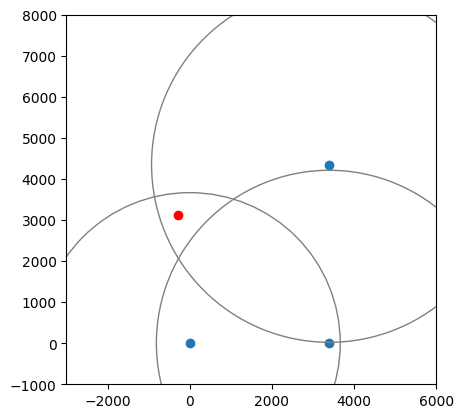

In [4]:

fig, ax = plt.subplots()
ax.scatter(df["x"], df["y"])
ax.set(xlim=(-3000,6000), ylim=(-1000,8000))
display(df)
for _, data in df.iterrows():
    circle = plt.Circle( (data.x, data.y),
                        data.distance,
                        fill = False,
                        color="grey")
    ax.set_aspect(1)
    ax.add_artist(circle)

ax.scatter(ret[0], ret[1], color="red")
ax.add_artist(plt.Circle(ret, ))

plt.show()